# ADXIndicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.trend import ADXIndicator

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [2]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv") #tpsl


## Variations and default correlations

In [3]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "adx_"
    for w in windows:
        i = ADXIndicator(df.high, df.low, df.close, window=w)
        sma_name = name + str(w)
#         df[sma_name] = i.adx()
        df[sma_name + "_neg"] = i.adx_neg()
        df[sma_name + "_pos"] = i.adx_pos()

#         df[sma_name + "_diff"] = list(map(lambda s, c: uf.none_subtraction(s, c), df[sma_name], df.close))
#         df[sma_name + "_diff_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_diff"]))
#         df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
#         df[sma_name + "_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df[sma_name + "_diff_o_close"]))
#         df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
# #         df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
#         df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
# #         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])
        
        
        

In [4]:
variations([5, 7, 10, 15, 20, 30])

In [5]:
indicators = list(df.columns)[13:]
indicators.append("target")
len(indicators)

14

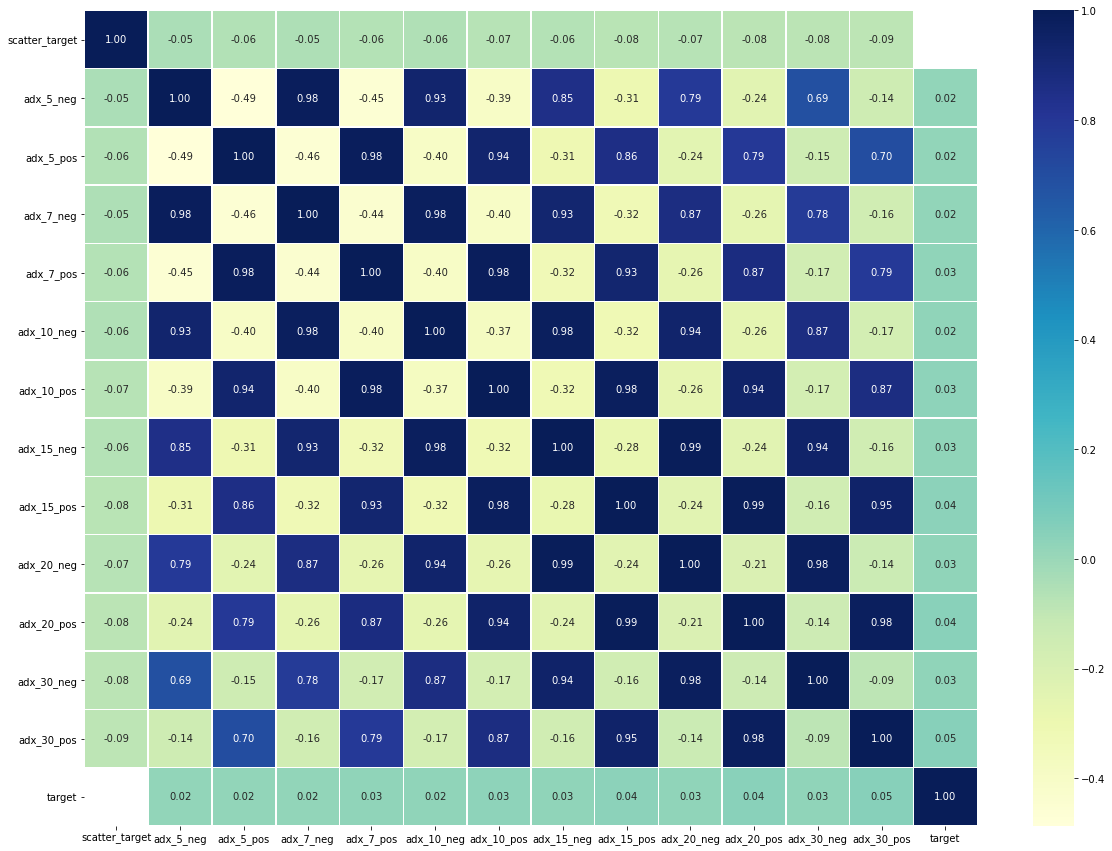

In [6]:
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

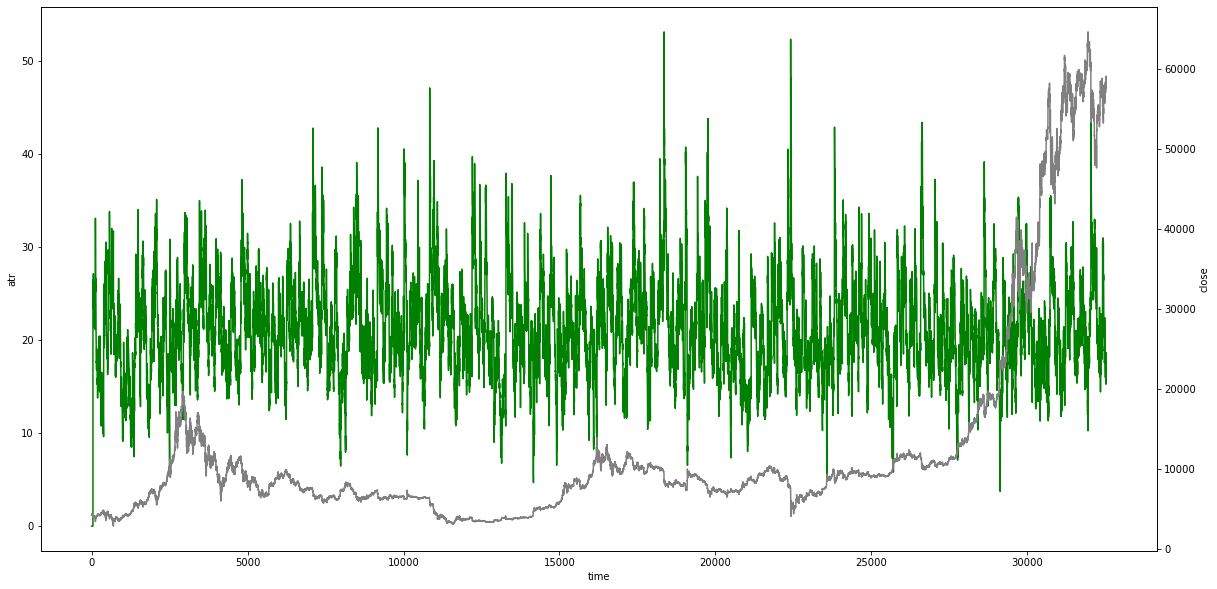

In [47]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.adx_40_neg,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Variations

adx_40_neg

adx_50_pos